In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
sess = tf.InteractiveSession()

In [2]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2016-11-19 22:00:12--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: 'iris.data.5'

iris.data.5         100%[=====================>]   4.44K  --.-KB/s   in 0s     

2016-11-19 22:00:12 (15.7 MB/s) - 'iris.data.5' saved [4551/4551]



In [43]:
iris = (
    pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
    .assign(target=lambda df: df.species.astype('category').cat.codes))

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [44]:
n_samples = iris.shape[0]
n_classes = iris.target.nunique()

In [51]:
x_1 = iris.sepal_length.values.reshape((n_samples, 1))
x_2 = iris.petal_width.values.reshape((n_samples, 1))
train_X = np.hstack([np.ones_like(x_1), x_1, x_2])
train_Y = iris.target.values.reshape(n_samples, 1)

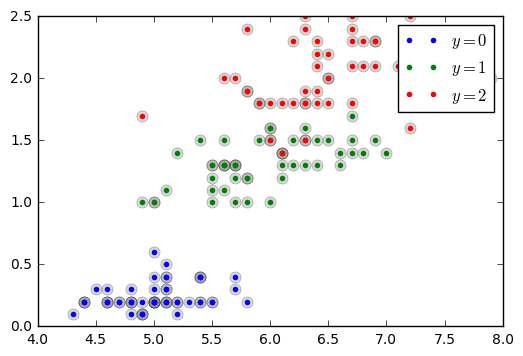

In [52]:
def plot_result(predicted_probs=None):

    if predicted_probs is None:
        plt.plot(x_1, x_2, 'o', ms=8, alpha=.3, color='grey');
    else:
        predicted_classes = np.argmax(predicted_probs, axis=1)
        for c in range(n_classes):
            mask = predicted_classes == c
            plt.plot(x_1[mask], x_2[mask], 'ob', ms=8, alpha=.3, mec='none')

    for c in range(n_classes):
        mask = iris.target.values == c    
        plt.plot(x_1[mask], x_2[mask], 'o', ms=4, mec='none', label='$y = {}$'.format(c));
    plt.legend()
    
plot_result()